# Importing Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Loading the datasets

In [27]:
itm04 = pd.read_csv("ITM04.20250320T130342.csv")
itm07 = pd.read_csv("ITM07.20250320T130320.csv")
tmq08 = pd.read_csv("TMQ08.20250325202825.csv")

In [49]:
itm04['Month'] = pd.to_datetime(itm04['Month'], format='%Y %B')
itm07['Monthly'] = pd.to_datetime(itm07['Monthly'], format='%Y %B')

# EDA: Check for Nulls and Data Types

In [51]:
print ("Missing values in itm04:\n", itm04.isnull().sum())
print ("Missing values in itm07:\n", itm07.isnull().sum())
print ("Missing values in tmq08:\n", tmq08.isnull().sum())

Missing values in itm04:
 Statistic Label           0
Month                     0
Main Reason for Travel    0
UNIT                      0
VALUE                     0
dtype: int64
Missing values in itm07:
 Statistic Label    0
Monthly            0
Residency          0
UNIT               0
VALUE              0
dtype: int64
Missing values in tmq08:
 C02118V02559          0
Reason for Journey    0
TLIST(Q1)             0
Quarter               0
STATISTIC             0
Statistic Label       0
UNIT                  0
VALUE                 0
dtype: int64


In [53]:
print("\nData types:\n")
print(itm04.dtypes)
print(itm07.dtypes)
print(tmq08.dtypes)


Data types:

Statistic Label                   object
Month                     datetime64[ns]
Main Reason for Travel            object
UNIT                              object
VALUE                            float64
dtype: object
Statistic Label            object
Monthly            datetime64[ns]
Residency                  object
UNIT                       object
VALUE                     float64
dtype: object
C02118V02559           object
Reason for Journey     object
TLIST(Q1)               int64
Quarter                object
STATISTIC              object
Statistic Label        object
UNIT                   object
VALUE                 float64
dtype: object


# accommodation data

In [89]:
prep = itm07.copy()
prep = prep[prep['Residency'] != 'All Residencies']
#prep = prep.drop(columns = ['Monthly', 'Unit'])

In [91]:
le = LabelEncoder()
prep['Residency_encoded'] = le.fit_transform(prep['Residency'])

In [93]:
imp = SimpleImputer(strategy='mean')
prep['VALUE'] = imp.fit_transform(prep[['VALUE']])

In [101]:
scaler = StandardScaler()
#prep['value_scaled']  = scaler.fit_transform[['VALUE']])

In [107]:
#print("\nPrepared Data Sample:\")
      

In [105]:
print(prep.head())

                                     Statistic Label    Monthly  \
0  Mean Nightly Accommodation Costs of Overnight ... 2023-01-01   
1  Mean Nightly Accommodation Costs of Overnight ... 2023-01-01   
2  Mean Nightly Accommodation Costs of Overnight ... 2023-01-01   
3  Mean Nightly Accommodation Costs of Overnight ... 2023-01-01   
5  Mean Nightly Accommodation Costs of Overnight ... 2023-02-01   

                                   Residency  UNIT  VALUE  Residency_encoded  
0  Great Britain (England, Scotland & Wales)  Euro   94.0                  0  
1                           Other Europe (3)  Euro   57.0                  1  
2                               USA & Canada  Euro   88.0                  3  
3                          Other Residencies  Euro   51.0                  2  
5  Great Britain (England, Scotland & Wales)  Euro   91.0                  0  


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.stats import poisson, binomial, normal, skewness, kurtosis

In [113]:
itm04 = pd.read_csv("ITM04.20250320T130342.csv")
itm07 = pd.read_csv("ITM07.20250320T130320.csv")
tmq08 = pd.read_csv("TMQ08.20250325202825.csv")

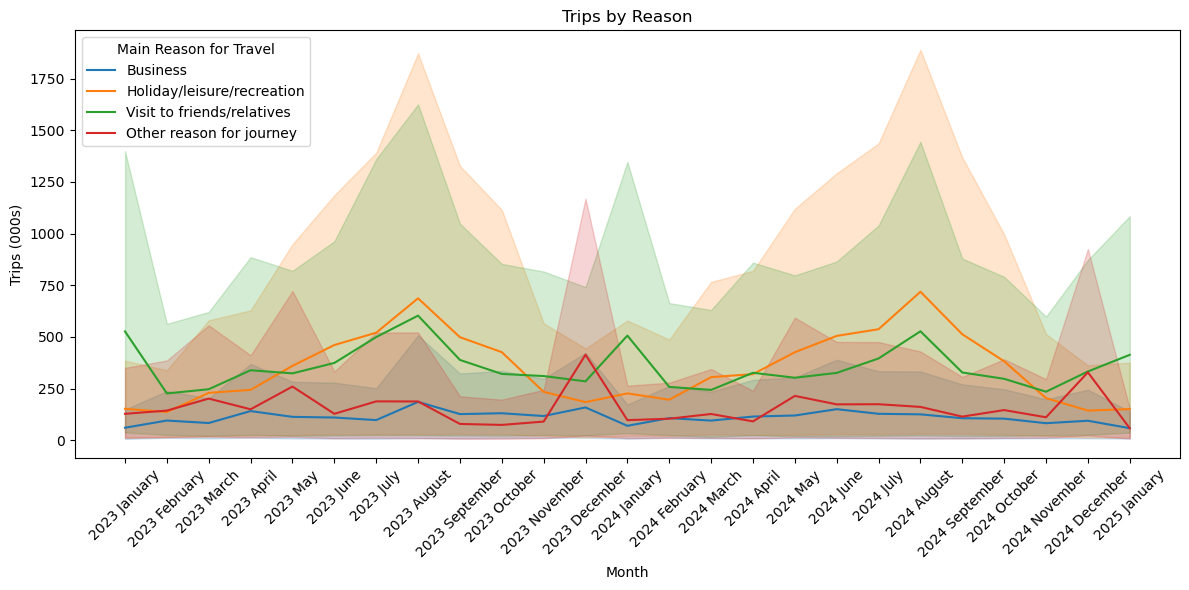

In [117]:
plt.figure(figsize=(12, 6))
travel = itm04[itm04['Main Reason for Travel'] != 'All reasons for journey']
sns.lineplot(data=travel, x='Month', y='VALUE', hue='Main Reason for Travel')
plt.title('Trips by Reason')
plt.ylabel('Trips (000s)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

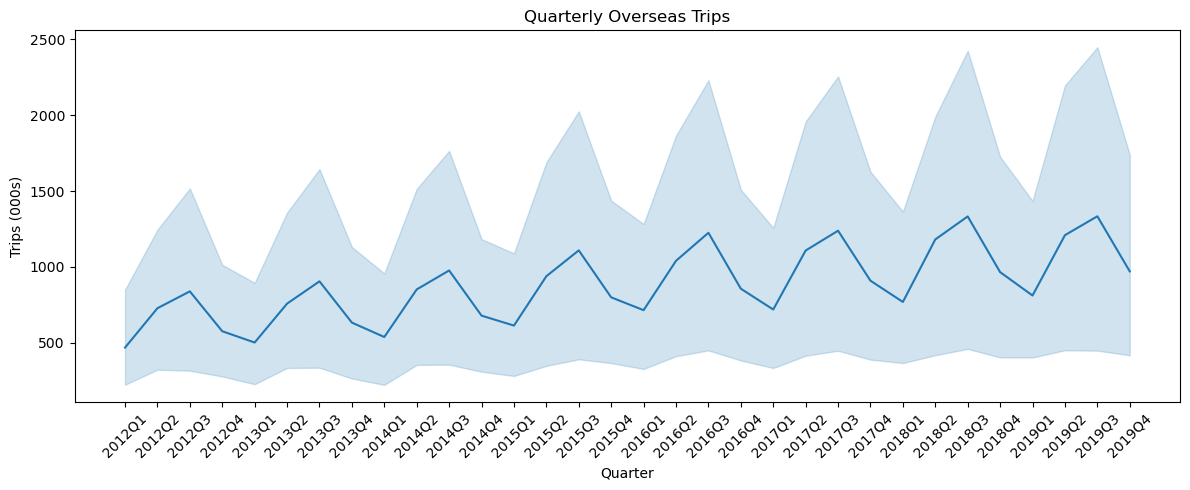

In [131]:
visits = tmq08[tmq08['Statistic Label'] == 'Overseas Trips to Ireland by Non-Residents']
plt.figure(figsize=(12, 5))
sns.lineplot(data=visits, x='Quarter', y='VALUE')
plt.title('Quarterly Overseas Trips')
plt.ylabel('Trips (000s)')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

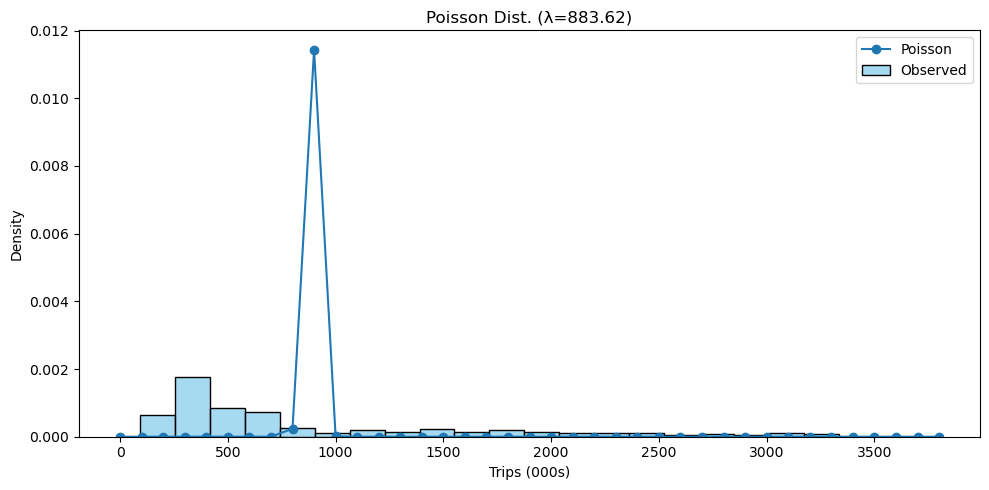

In [133]:
trips = visits['VALUE'].astype(int)
lam = trips.mean()
x_pois = np.arange(0, int(trips.max()) + 500, 100)
y_pois = poisson.pmf(x_pois, mu=lam)

plt.figure(figsize=(10, 5))
sns.histplot(trips, bins=20, stat='density', color='skyblue', label='Observed')
plt.plot(x_pois, y_pois, marker='o', label='Poisson')
plt.title(f'Poisson Dist. (λ={lam:.2f})')
plt.xlabel('Trips (000s)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# find l tgd report finished today then upload all assessment

# Dataset1 URI: https://data.gov.ie/dataset/tma08-overseas-trips-to-and-from-ireland,
# Dataset2 URI: https://data.gov.ie/dataset/tma20-overseas-trips-to-ireland-by-non-residents/resource/e715c1ce-3e8e-47f6-9522-3fb6a177f493,
# Dataset3 URI: link tavih ,